<a href="https://colab.research.google.com/github/oguzhancelik1103/KalpHastaliklariYapaySinirAgiUygulamasi/blob/main/KalpHastaliklariYapaySinirAgiUygulamasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
import os

In [7]:
file_path = r"/content/ah_kalbim.csv"

In [8]:
dataframe=pd.read_csv(file_path)
print(dataframe.head())

   yas  cinsiyet  gogus_agrı_tipi  dinlenme_kan_basıncı  Kolesterol  \
0   63         1                3                   145         233   
1   37         1                2                   130         250   
2   41         0                1                   130         204   
3   56         1                1                   120         236   
4   57         0                0                   120         354   

   Aclık_Kan_Sekeri  Elektrokardiyografik_Ölcümü  Ulasılan_maks_kalp_hızı  \
0                 1                            0                      150   
1                 0                            1                      187   
2                 0                            0                      172   
3                 0                            1                      178   
4                 0                            1                      163   

   egzersize_baglı_durumu  depresyon_ST  egim  ca  talasemi  sonuc  
0                       0           2.3  

In [9]:
dataframe.isnull().sum()

,0
yas,0
cinsiyet,0
gogus_agrı_tipi,0
dinlenme_kan_basıncı,0
Kolesterol,0
Aclık_Kan_Sekeri,0
Elektrokardiyografik_Ölcümü,0
Ulasılan_maks_kalp_hızı,0
egzersize_baglı_durumu,0
depresyon_ST,0


In [10]:
dataframe.describe()

,yas,cinsiyet,gogus_agrı_tipi,dinlenme_kan_basıncı,Kolesterol,Aclık_Kan_Sekeri,Elektrokardiyografik_Ölcümü,Ulasılan_maks_kalp_hızı,egzersize_baglı_durumu,depresyon_ST,egim,ca,talasemi,sonuc
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
dataframe.corr()["sonuc"].sort_values()

,sonuc
egzersize_baglı_durumu,-0.436757
depresyon_ST,-0.430696
ca,-0.391724
talasemi,-0.344029
cinsiyet,-0.280937
yas,-0.225439
dinlenme_kan_basıncı,-0.144931
Kolesterol,-0.085239
Aclık_Kan_Sekeri,-0.028046
Elektrokardiyografik_Ölcümü,0.137230


<Axes: >

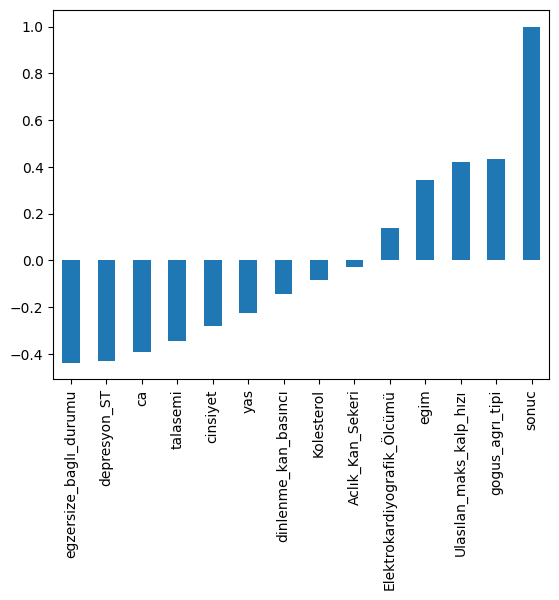

In [12]:
dataframe.corr()["sonuc"].sort_values().plot(kind="bar")

In [13]:
import matplotlib.pyplot as plt
import seaborn as sbn

<Axes: xlabel='sonuc', ylabel='count'>

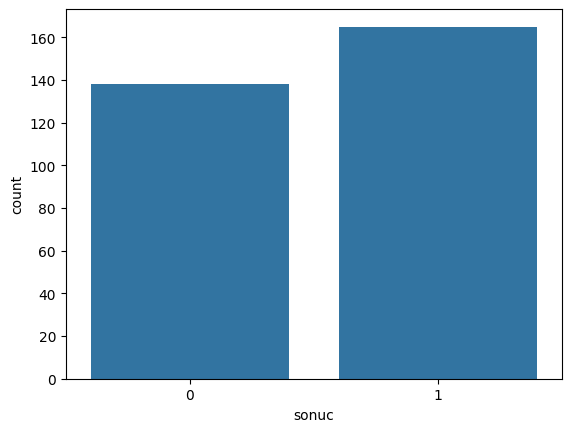

In [14]:
sbn.countplot(x="sonuc",data=dataframe)

In [15]:
import tensorflow as tf

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y=dataframe["sonuc"].values

In [18]:
x=dataframe.drop("sonuc",axis=1).values

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=3)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model=Sequential()

In [23]:
x_train.shape

(203, 13)

In [24]:
model.add(Dense(13,activation="relu"))
model.add(Dense(13,activation="relu"))
model.add(Dense(13,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [26]:
model.compile(loss="binary_crossentropy",optimizer="adam")

In [28]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=500,verbose=1)

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3365 - val_loss: 0.3572
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3365 - val_loss: 0.3558
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3023 - val_loss: 0.3570
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3204 - val_loss: 0.3671
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3551 - val_loss: 0.3579
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3424 - val_loss: 0.3568
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3233 - val_loss: 0.3606
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3130 - val_loss: 0.3568
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3310 - val_loss: 0.3567
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3284 - val_loss: 0.3564
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2981 - val_loss: 0.3563
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3281 - val_lo

In [30]:
modelkaybi=pd.DataFrame(model.history.history)

<Axes: >

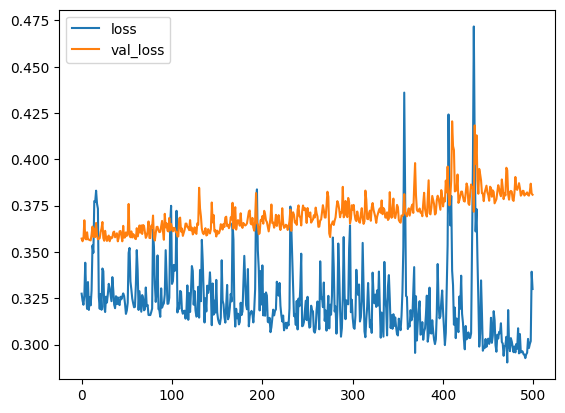

In [31]:
modelkaybi.plot()

In [41]:
tahmin=model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [42]:
tahmin

array([[1.47019446e-01],
       [9.16405320e-01],
       [4.69254196e-01],
       [9.88281369e-01],
       [9.14425731e-01],
       [9.99930739e-01],
       [1.35292412e-05],
       [1.23559022e-02],
       [7.80519187e-01],
       [9.65124130e-01],
       [1.73479058e-02],
       [6.46927208e-02],
       [5.52434504e-01],
       [3.15204114e-02],
       [9.39582661e-03],
       [4.12298858e-01],
       [9.07660365e-01],
       [1.43059924e-01],
       [9.82306778e-01],
       [9.41632867e-01],
       [1.01063242e-02],
       [9.86231208e-01],
       [9.56363916e-01],
       [8.92480552e-01],
       [9.81675923e-01],
       [9.95140076e-01],
       [9.57563937e-01],
       [7.53827870e-01],
       [8.12186837e-01],
       [1.98980415e-05],
       [9.48045075e-01],
       [8.65596719e-03],
       [4.89210099e-01],
       [1.39185384e-01],
       [5.68395078e-01],
       [2.80466974e-02],
       [9.86677587e-01],
       [7.36665189e-01],
       [8.93605530e-01],
       [8.08761239e-01],


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
tahmin_siniflari = (tahmin > 0.5).astype("int32")

In [46]:
print(confusion_matrix(y_test, tahmin_siniflari))
print(classification_report(y_test, tahmin_siniflari))

[[32 11]
 [ 5 52]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.80        43
           1       0.83      0.91      0.87        57

    accuracy                           0.84       100
   macro avg       0.85      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100

